# **Industrial Copper Modeling**

## **Problem Statement:**

The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data.

Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer . You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.

**Approach**
1.   Exploring skewness and outliers in the dataset.
2.   Transform the data into a suitable format and perform any necessary cleaning and pre-processing steps.

3. ML Regression model which predicts continuous variable ‘Selling_Price’.
4. ML Classification model which predicts Status: WON or LOST.
5. Creating a streamlit page where you can insert each column value and you will get the Selling_Price predicted value or Status(Won/Lost)


## Reading and Understanding the data

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the formatting parameters
pd.set_option('display.max_columns',500) # To display max columns
pd.set_option('display.max_row',1000) # To display max rows
pd.options.display.float_format = "{:,.2f}".format #format floating-point number

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/Dataset/GUVI/Copper_Set.xlsx'

Mounted at /content/drive


In [4]:
# Read data from an Excel file
copper_rawdata = pd.read_excel(dataset, sheet_name='Result 1')
print('The dataset has ',copper_rawdata.shape[0],' records and ', copper_rawdata.shape[1], ' variables')

The dataset has  181673  records and  14  variables


In [5]:
copper_rawdata.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,"20,210,401.00",54.15,"30,156,308.00",28.00,Won,W,10.00,2.00,"1,500.00",DEQ1 S460MC,1670798778,"20,210,701.00",854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,"20,210,401.00",768.02,"30,202,938.00",25.00,Won,W,41.00,0.80,"1,210.00",0000000000000000000000000000000000104991,1668701718,"20,210,401.00","1,047.00"
2,E140FF1B-2407-4C02-A0DD-780A093B1158,"20,210,401.00",386.13,"30,153,963.00",30.00,Won,WI,28.00,0.38,952.00,S0380700,628377,"20,210,101.00",644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,"20,210,401.00",202.41,"30,349,574.00",32.00,Won,S,59.00,2.30,"1,317.00",DX51D+ZM310MAO 2.3X1317,1668701718,"20,210,101.00",768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,"20,210,401.00",785.53,"30,211,560.00",28.00,Won,W,10.00,4.00,"2,000.00",2_S275JR+AR-CL1,640665,"20,210,301.00",577.00


## **About the Data:**

1. `id`: This column likely serves as a unique identifier for each transaction or item, which can be useful for tracking and record-keeping.
2. `item_date`: This column represents the date when each transaction or item was recorded or occurred. It's important for tracking the timing of business activities.
3. `quantity tons`: This column indicates the quantity of the item in tons, which is essential for inventory management and understanding the volume of products sold or produced.
4. `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items. It's crucial for maintaining customer relationships and tracking sales.
5. `country`: The "country" column specifies the country associated with each customer. This information can be useful for understanding the geographic distribution of customers and may have implications for logistics and international sales.
6. `status`: The "status" column likely describes the current status of the transaction or item. This information can be used to track the progress of orders or transactions, such as "Draft" or "Won."
7. `item type`: This column categorizes the type or category of the items being sold or produced. Understanding item types is essential for inventory categorization and business reporting.
8. `application`: The "application" column defines the specific use or application of the items. This information can help tailor marketing and product development efforts.
9. `thickness`: The "thickness" column provides details about the thickness of the items. It's critical when dealing with materials where thickness is a significant factor, such as metals or construction materials.
10. `width`: The "width" column specifies the width of the items. It's important for understanding the size and dimensions of the products.
11. `material_ref`: This column appears to be a reference or identifier for the material used in the items. It's essential for tracking the source or composition of the products.
12. `product_ref`: The "product_ref" column seems to be a reference or identifier for the specific product. This information is useful for identifying and cataloging products in a standardized way.
13. `delivery date`: This column records the expected or actual delivery date for each item or transaction. It's crucial for managing logistics and ensuring timely delivery to customers.
14. `selling_price`: The "selling_price" column represents the price at which the items are sold. This is a critical factor for revenue generation and profitability analysis.


### **Features/Independent variables:**
1. `id`:
2. `item_date`
3. `quantity tons`
4. `customer`
5. `country`
6. `item type`:
7. `application`
8. `thickness`
9. `width`
10. `material_ref`
11. `product_ref`
12. `delivery date`

### **Target/Dependent variables:**

1. `status` - Classification
2. `selling_price`- Regression

In [209]:
copper_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181672 entries, 0 to 181671
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181671 non-null  float64
 2   quantity tons  181672 non-null  object 
 3   customer       181671 non-null  float64
 4   country        181644 non-null  float64
 5   status         181670 non-null  object 
 6   item type      181672 non-null  object 
 7   application    181648 non-null  float64
 8   thickness      181671 non-null  float64
 9   width          181672 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181672 non-null  int64  
 12  delivery date  181671 non-null  float64
 13  selling_price  181671 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


**Interference**
* The dataset is having 181673 records and 14 columns.
* It is having the following dtypes float64(8), int64(1), object(5).
* The Memory usage: 19.4+ MB

In [210]:
# Checking for Null values
copper_rawdata.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77918
product_ref          0
delivery date        1
selling_price        1
dtype: int64

### Checking for duplicate values

In [211]:
# Checking for duplicate records
copper_rawdata.duplicated().sum()

0

**Interference:**
* There is no duplicate values.

In [212]:
# Checking for duplicates 'id'
copper_rawdata['id'].duplicated().sum()

0

In [213]:
# Dropping duplicate values
copper_rawdata.drop_duplicates(subset=['id'], keep= 'last', inplace=True)
copper_rawdata = copper_rawdata.reset_index(drop=True)

In [214]:
copper_rawdata.shape

(181672, 14)

In [215]:
# Creating a copy of the dataframe
copper = copper_rawdata.copy()

# Data Cleaning

In [216]:
#Formatting feature names
print('Before Formating', (copper_rawdata.columns).tolist())
copper.columns = map(str.lower, copper.columns.str.replace(' ','_'))
print()
print('After Formating', (copper.columns).tolist())

Before Formating ['id', 'item_date', 'quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery date', 'selling_price']

After Formating ['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status', 'item_type', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery_date', 'selling_price']


In [217]:
copper.nunique()

id               181671
item_date           252
quantity_tons    181672
customer           1169
country              17
status                9
item_type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery_date        28
selling_price      9795
dtype: int64

In [218]:
# @title Checking unique values in each feature { run: "auto", form-width: "25%" }
feature_name = "customer" # @param ['id', 'item_date','quantity_tons','customer','country','status','item_type','application','thickness','width','material_ref','product_ref','delivery_date','selling_price']
print('Total Unique values',copper[feature_name].nunique())
print()
print(feature_name, copper[feature_name].unique())

Total Unique values 1169

customer [30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]


In [219]:
# Droping the 'id' columns from dataframe
copper.drop(['id'], axis = 1, inplace=True)

In [220]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181672 entries, 0 to 181671
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181671 non-null  float64
 1   quantity_tons  181672 non-null  object 
 2   customer       181671 non-null  float64
 3   country        181644 non-null  float64
 4   status         181670 non-null  object 
 5   item_type      181672 non-null  object 
 6   application    181648 non-null  float64
 7   thickness      181671 non-null  float64
 8   width          181672 non-null  float64
 9   material_ref   103754 non-null  object 
 10  product_ref    181672 non-null  int64  
 11  delivery_date  181671 non-null  float64
 12  selling_price  181671 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 18.0+ MB


**Interference:**
 0. item_date      =  float64 ==> datetime
 1.   quantity tons  =  object ==> int/float
 2. customer = float64 ==> object
 3.   country        =  float64 ==> object
 4.  status         =  object ==> Cleaning
 5.  item type      =  object ==>
 6.  application    =  float64 ==> object
 7.   thickness      =  float64 ==> ⩗
 8.   width          =  float64 ==> ⩗
 9.   material_ref   =  object ==> cleaning
 10.   product_ref    =  int64  ==> cleaning
 11.  delivery date  =  float64 ==> datetime
 12.  selling_price  =  float64 ==>

In [221]:
# Checking NULL values
copper.isnull().sum()

item_date            1
quantity_tons        0
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77918
product_ref          0
delivery_date        1
selling_price        1
dtype: int64

**Interference :**
* material_ref feature has 77918 NaN values


In [222]:
copper.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,"20,210,401.00",54.15,"30,156,308.00",28.00,Won,W,10.00,2.00,"1,500.00",DEQ1 S460MC,1670798778,"20,210,701.00",854.00
1,"20,210,401.00",768.02,"30,202,938.00",25.00,Won,W,41.00,0.80,"1,210.00",0000000000000000000000000000000000104991,1668701718,"20,210,401.00","1,047.00"


### Cleaning status

In [223]:
# Keeping only won and lost labels for analysis
def status_clean():
  status_drop_list = []
  for i in range(0,len(copper['status']),1):
    if ((copper['status'][i] != 'Won') and (copper['status'][i] != 'Lost')):
      status_drop_list.append(i)
  copper.drop(index=status_drop_list, axis=0,inplace =True)
  copper.reset_index(drop=True)
  copper['status'] = copper['status'].apply(lambda x: 0 if x == 'Lost' else 1)
  copper.reset_index(drop=True, inplace=True)
  return copper['status'].value_counts(dropna=False)

status_clean()

1    116010
0     34438
Name: status, dtype: int64

**Interference :**
* The target column 'status' is cleaned for bivariant ('Won' and 'Lost').
* The status traget variable for classificaion model is unbalenced.

In [224]:
copper.shape

(150448, 13)

**Interference:**

* The total of 150448 records are available for further analysis.

### Cleaning item_date feature

In [225]:
copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y%m%d', errors='coerce').dt.date
copper['delivery_date'] = pd.to_datetime(copper['delivery_date'], format='%Y%m%d', errors='coerce').dt.date

In [226]:
copper['item_date'][:1]

0    2021-04-01
Name: item_date, dtype: object

In [227]:
copper['item_date'].isnull().sum()

3

In [228]:
# Fill null values with mode
copper['item_date'].fillna(copper['item_date'].mode().iloc[0],inplace=True)
copper['delivery_date'].fillna(copper['delivery_date'].mode().iloc[0],inplace=True)

In [229]:
# Inserting a new column to check the item date and delivery data
copper.insert(12,'processing_time',0)
# Converting features to datetime format
copper['processing_time'] = pd.to_datetime(copper['processing_time'])
# Calculate the number of days to process the order
for i in range(0,len(copper['processing_time']),1):
  copper['processing_time'][i] = (copper['delivery_date'][i] - copper['item_date'][i]).days

In [230]:
# Checking for ambiguity in processing_time
copper[copper['processing_time'] <=7 ]['processing_time'].value_counts().sum()

19196

**Interference :**
* There are **15945** negative values and 3547 records less than 7 days.
* This is due to misprinted values in the item_date and delivery_date.
* A minimum processing time of **7 days** is mandatory to process the order.
* Hence the records less than 7 days of processing time are droped.

In [231]:
copper['processing_time'] =copper['processing_time'].astype(int)

In [232]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150448 entries, 0 to 150447
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        150448 non-null  object 
 1   quantity_tons    150448 non-null  object 
 2   customer         150447 non-null  float64
 3   country          150444 non-null  float64
 4   status           150448 non-null  int64  
 5   item_type        150448 non-null  object 
 6   application      150445 non-null  float64
 7   thickness        150448 non-null  float64
 8   width            150448 non-null  float64
 9   material_ref     87649 non-null   object 
 10  product_ref      150448 non-null  int64  
 11  delivery_date    150448 non-null  object 
 12  processing_time  150448 non-null  int64  
 13  selling_price    150447 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 16.1+ MB


In [233]:
(copper.isnull().sum())

item_date              0
quantity_tons          0
customer               1
country                4
status                 0
item_type              0
application            3
thickness              0
width                  0
material_ref       62799
product_ref            0
delivery_date          0
processing_time        0
selling_price          1
dtype: int64

In [234]:
((copper.isnull().sum())/(len(copper)))*100

item_date          0.00
quantity_tons      0.00
customer           0.00
country            0.00
status             0.00
item_type          0.00
application        0.00
thickness          0.00
width              0.00
material_ref      41.74
product_ref        0.00
delivery_date      0.00
processing_time    0.00
selling_price      0.00
dtype: float64

## Cleaning 'material_ref'

In [235]:
copper['material_ref'].value_counts(dropna=False)

NaN                              62799
DX51D+Z                            851
DC01 RED.FLAT KUCHNIA EKO 2.2      776
G9010                              623
DC01                               600
                                 ...  
DX51DZ275-1324X0.8                   1
DX52DZ100-1242X0.3                   1
M5648                                1
M5649                                1
202006170005.IO.1.1                  1
Name: material_ref, Length: 15821, dtype: int64

In [236]:
# Cleaning material_ref column
def mat_ref_clean():
  ma_ref_nan_actual = copper['material_ref'].isnull().sum()
  for j in range(0, len(copper['material_ref']), 1):
    if isinstance(copper['material_ref'].iloc[j], str) and (copper['material_ref'].iloc[j][:5] == '00000'):
      copper['material_ref'].iloc[j] = ''
  copper['material_ref'] = copper['material_ref'].replace(r'',np.NaN)
  ma_ref_nan_final = copper['material_ref'].isnull().sum()
  view = print('Total NaN values after cleaning = ',ma_ref_nan_final)
  return view
mat_ref_clean()

Total NaN values after cleaning =  82418


**Interference:**
* **'material_ref'** has lot of anamolies in the data.
* Hence this feature can be droped.

In [237]:
# Droping the feature 'material_ref'
copper.drop('material_ref', axis= 1, inplace=True)

**Interference:**
* After dropping 'material_ref' feature, there is 150445 records with 11 columns for analysis.

In [238]:
#Creating a second copy
copper1 = copper.copy()

## Cleaning quantity_tons

In [239]:
# Checking the dtype
copper1['quantity_tons'].dtype

dtype('O')

**Interference:**
* The 'quantity_tons' dtype is object.
* It has a continuous value. So, it has to be converted to numerical data type.

In [240]:
copper1['quantity_tons'] = copper1['quantity_tons'].replace('e',np.NaN)

In [241]:
copper1['quantity_tons'] = copper1['quantity_tons'].astype(float)

In [242]:
copper1['quantity_tons'].value_counts(dropna=False)

54.15     1
3.72      1
89.24     1
10.28     1
52.54     1
         ..
72.95     1
32.60     1
89.14     1
10.52     1
406.69    1
Name: quantity_tons, Length: 150448, dtype: int64

In [243]:
copper1['quantity_tons'].dtype

dtype('float64')

In [244]:
copper1['quantity_tons'].describe().T[['count','min','max']]

count   150,447.00
min      -2,000.00
max      70,252.36
Name: quantity_tons, dtype: float64

In [245]:
copper1['quantity_tons'] = copper1['quantity_tons'].apply(lambda x: np.nan if x<=1 else x)

In [246]:
# Fixing the analysis range greaterthan 1 ton.
copper1 = copper1[copper1['quantity_tons'] >= 1]
copper1 =copper1.reset_index(drop=True)

In [247]:
copper1['quantity_tons'].describe().T[['count','min','max']]

count   148,397.00
min           1.00
max      70,252.36
Name: quantity_tons, dtype: float64

## Cleaning product_ref

In [248]:
copper2 =copper1.copy()

In [249]:
copper2['product_ref'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148397 entries, 0 to 148396
Series name: product_ref
Non-Null Count   Dtype
--------------   -----
148397 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [250]:
copper2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148397 entries, 0 to 148396
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        148397 non-null  object 
 1   quantity_tons    148397 non-null  float64
 2   customer         148396 non-null  float64
 3   country          148393 non-null  float64
 4   status           148397 non-null  int64  
 5   item_type        148397 non-null  object 
 6   application      148394 non-null  float64
 7   thickness        148397 non-null  float64
 8   width            148397 non-null  float64
 9   product_ref      148397 non-null  int64  
 10  delivery_date    148397 non-null  object 
 11  processing_time  148397 non-null  int64  
 12  selling_price    148396 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 14.7+ MB


## Cleaning Country

In [251]:
copper2['country'].value_counts(dropna=False)

78.00     27465
26.00     22430
25.00     19709
32.00     17522
27.00     13605
28.00     13065
84.00      9823
77.00      9065
30.00      7273
39.00      2745
79.00      1632
38.00      1301
40.00      1273
80.00       792
113.00      603
89.00        88
NaN           4
107.00        2
Name: country, dtype: int64

In [252]:
copper2 = copper2.dropna(subset=['country']).reset_index(drop=True)

In [253]:
copper2['country'] = copper2['country'].astype(int)
copper2['country'].dtype

dtype('int64')

## Cleaning item_type

In [254]:
copper2['item_type'].value_counts(dropna=False)

W         90090
S         52461
PL         4847
WI          504
Others      463
IPL          27
SLAWR         1
Name: item_type, dtype: int64

In [255]:
# Drop rows where 'item_type' is 'IPL' or 'SLAWR'
copper2 = copper2[(copper2['item_type'] != 'IPL') & (copper2['item_type'] != 'SLAWR')]
copper2 = copper2.reset_index(drop=True)

In [256]:
copper2['item_type'] = copper2['item_type'].map({'W':1,'S':2,'PL':3,'WI':4,'Others':5})
copper2['item_type'].value_counts(dropna=False)

1    90090
2    52461
3     4847
4      504
5      463
Name: item_type, dtype: int64

In [257]:
copper2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148365 entries, 0 to 148364
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        148365 non-null  object 
 1   quantity_tons    148365 non-null  float64
 2   customer         148364 non-null  float64
 3   country          148365 non-null  int64  
 4   status           148365 non-null  int64  
 5   item_type        148365 non-null  int64  
 6   application      148365 non-null  float64
 7   thickness        148365 non-null  float64
 8   width            148365 non-null  float64
 9   product_ref      148365 non-null  int64  
 10  delivery_date    148365 non-null  object 
 11  processing_time  148365 non-null  int64  
 12  selling_price    148364 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 14.7+ MB


## Cleaning application

In [258]:
copper2['application'][:5]

0   10.00
1   41.00
2   28.00
3   59.00
4   10.00
Name: application, dtype: float64

In [259]:
copper2['application'] = copper2['application'].astype(int)

In [260]:
copper2['application'][:5]

0    10
1    41
2    28
3    59
4    10
Name: application, dtype: int64

## Cleaning Thickness

In [261]:
copper2['thickness'].value_counts(dropna=False)

2.00        11109
3.00        11071
1.50         9644
0.50         8996
1.00         7786
4.00         7600
2.50         5982
0.60         5824
5.00         5537
6.00         4777
0.80         4643
0.70         4423
8.00         3090
1.25         2957
0.75         2589
0.45         2575
0.55         2503
10.00        2172
1.20         2078
0.90         1984
0.40         1599
12.00        1258
3.50         1128
1.80         1110
0.74          986
0.47          973
0.63          965
15.00         868
0.62          752
0.68          690
0.59          679
1.75          652
1.40          652
0.43          644
0.48          643
0.88          615
1.15          615
1.60          566
0.65          535
0.58          533
9.99          486
7.00          456
4.50          444
1.45          444
1.90          427
0.95          389
0.42          382
2.90          367
2.80          360
0.72          358
0.35          345
0.32          334
11.99         329
2.60          325
1.95          307
14.99     

In [262]:
copper2['width'].value_counts(dropna=False)

1,250.00    30833
1,500.00    27401
1,000.00    10297
2,000.00     6585
1,220.00     4307
            ...  
1.00            1
606.00          1
738.00          1
656.00          1
1,786.00        1
Name: width, Length: 1347, dtype: int64

In [263]:
copper2['width'] = copper2['width'].astype(int)
copper2['width'].dtype

dtype('int64')

## Cleaning selling_price

In [264]:
copper2['selling_price'].describe()

count   148,364.00
mean        825.66
std         291.94
min      -1,160.00
25%         671.00
50%         811.00
75%         951.00
max      81,236.14
Name: selling_price, dtype: float64

**Interference:**
* Minimum 'selling_price' is lessthan zero.
* It should be always be positive.


In [265]:
# Fixing the min value as 100 for selling_price
copper2 = copper2[(copper2['selling_price'] >= 100)]
copper2 = copper2.reset_index(drop=True)
copper2.shape

(148357, 13)

In [266]:
copper2.isnull().sum()

item_date          0
quantity_tons      0
customer           1
country            0
status             0
item_type          0
application        0
thickness          0
width              0
product_ref        0
delivery_date      0
processing_time    0
selling_price      0
dtype: int64

The NaN values in these columns cannot be filled

In [267]:
# dropping the records having null values
copper2 = copper2.dropna(subset=['customer','country','application'])

In [268]:
copper2.isnull().sum()

item_date          0
quantity_tons      0
customer           0
country            0
status             0
item_type          0
application        0
thickness          0
width              0
product_ref        0
delivery_date      0
processing_time    0
selling_price      0
dtype: int64

## Cleaning Customer

In [269]:
copper2['customer'][:5]

0   30,156,308.00
1   30,202,938.00
2   30,153,963.00
3   30,349,574.00
4   30,211,560.00
Name: customer, dtype: float64

In [270]:
copper2['customer'] = copper2['customer'].astype(int)
copper2['customer'].dtype

dtype('int64')

In [271]:
copper2.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,processing_time,selling_price
0,2021-04-01,54.15,30156308,28,1,1,10,2.00,1500,1670798778,2021-07-01,91,854.00
1,2021-04-01,768.02,30202938,25,1,1,41,0.80,1210,1668701718,2021-04-01,0,"1,047.00"
2,2021-04-01,386.13,30153963,30,1,4,28,0.38,952,628377,2021-01-01,-90,644.33
3,2021-04-01,202.41,30349574,32,1,2,59,2.30,1317,1668701718,2021-01-01,-90,768.00
4,2021-04-01,785.53,30211560,28,1,1,10,4.00,2000,640665,2021-03-01,-31,577.00


# EDA

In [272]:
copper3 = copper2.copy()

In [273]:
copper3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148356 entries, 0 to 148356
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_date        148356 non-null  object 
 1   quantity_tons    148356 non-null  float64
 2   customer         148356 non-null  int64  
 3   country          148356 non-null  int64  
 4   status           148356 non-null  int64  
 5   item_type        148356 non-null  int64  
 6   application      148356 non-null  int64  
 7   thickness        148356 non-null  float64
 8   width            148356 non-null  int64  
 9   product_ref      148356 non-null  int64  
 10  delivery_date    148356 non-null  object 
 11  processing_time  148356 non-null  int64  
 12  selling_price    148356 non-null  float64
dtypes: float64(3), int64(8), object(2)
memory usage: 15.8+ MB


### Check for skewness and outliers

In [274]:
col_numeric = ['quantity_tons', 'thickness', 'width', 'selling_price']

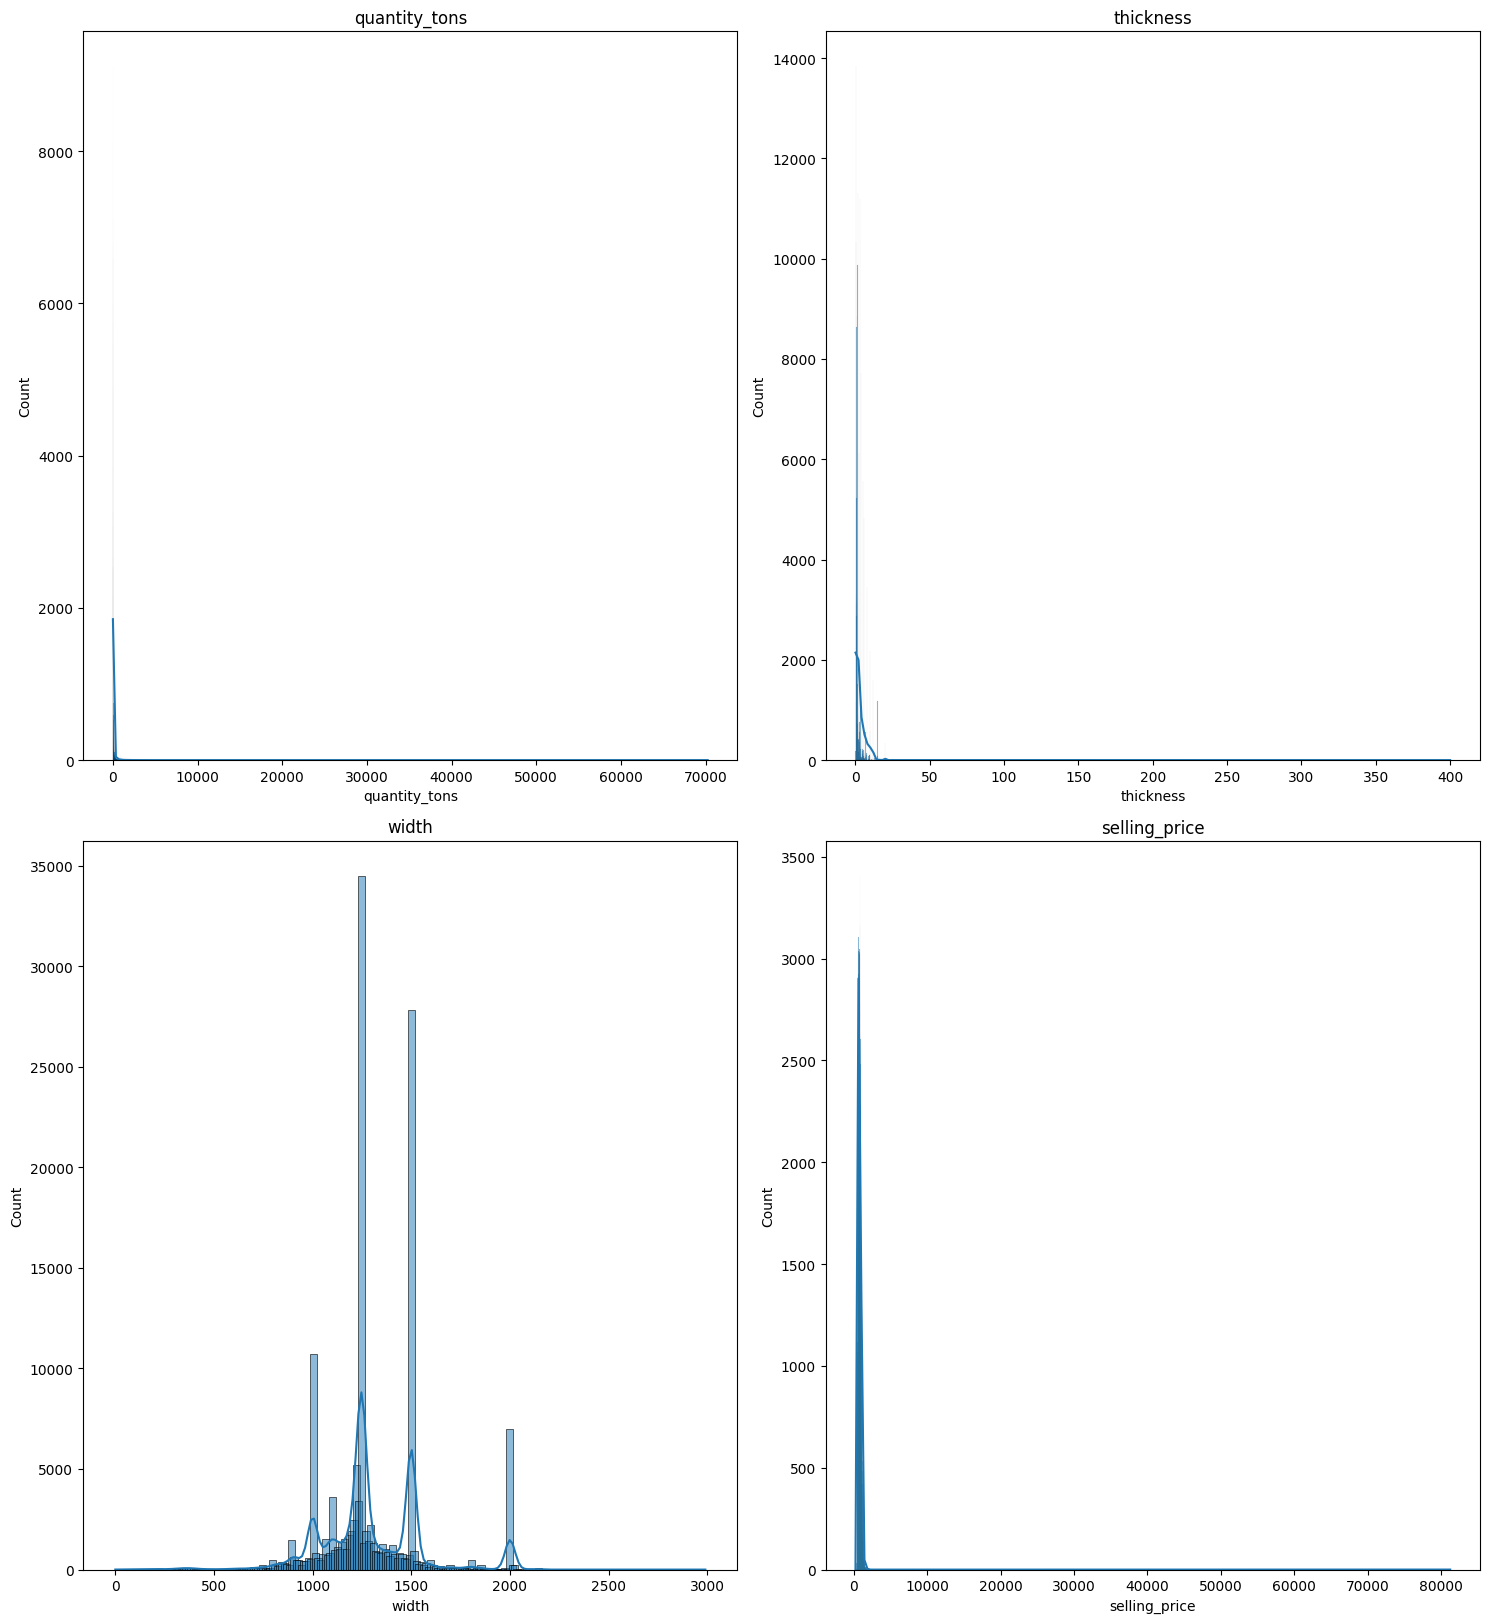

In [275]:
def check_skwness_histplot(numeric_col):
  n_col = len(numeric_col)
  n_rows = (n_col + 2) // 2
  fig, axs = plt.subplots(nrows=n_rows,ncols=2,figsize=(15,8*n_rows))
  axs =axs.flatten()

  for i, var in enumerate(numeric_col):
    sns.histplot(x=copper3[var],ax=axs[i],shrink=3,kde=True)
    axs[i].set_title(var)

  if n_col < len(axs):
    for i in range(n_col,len(axs)):
      fig.delaxes(axs[i])

  fig.tight_layout()
  plt.show()

check_skwness_histplot(col_numeric)

### Removing Skweness - using Log Transform

In [276]:
copper3['quantity_tons_log_tr'] = np.log(copper3['quantity_tons'])
copper3['thickness_log_tr'] = np.log(copper3['thickness'])
copper3['selling_price_log_tr'] = np.log(copper3['selling_price'])

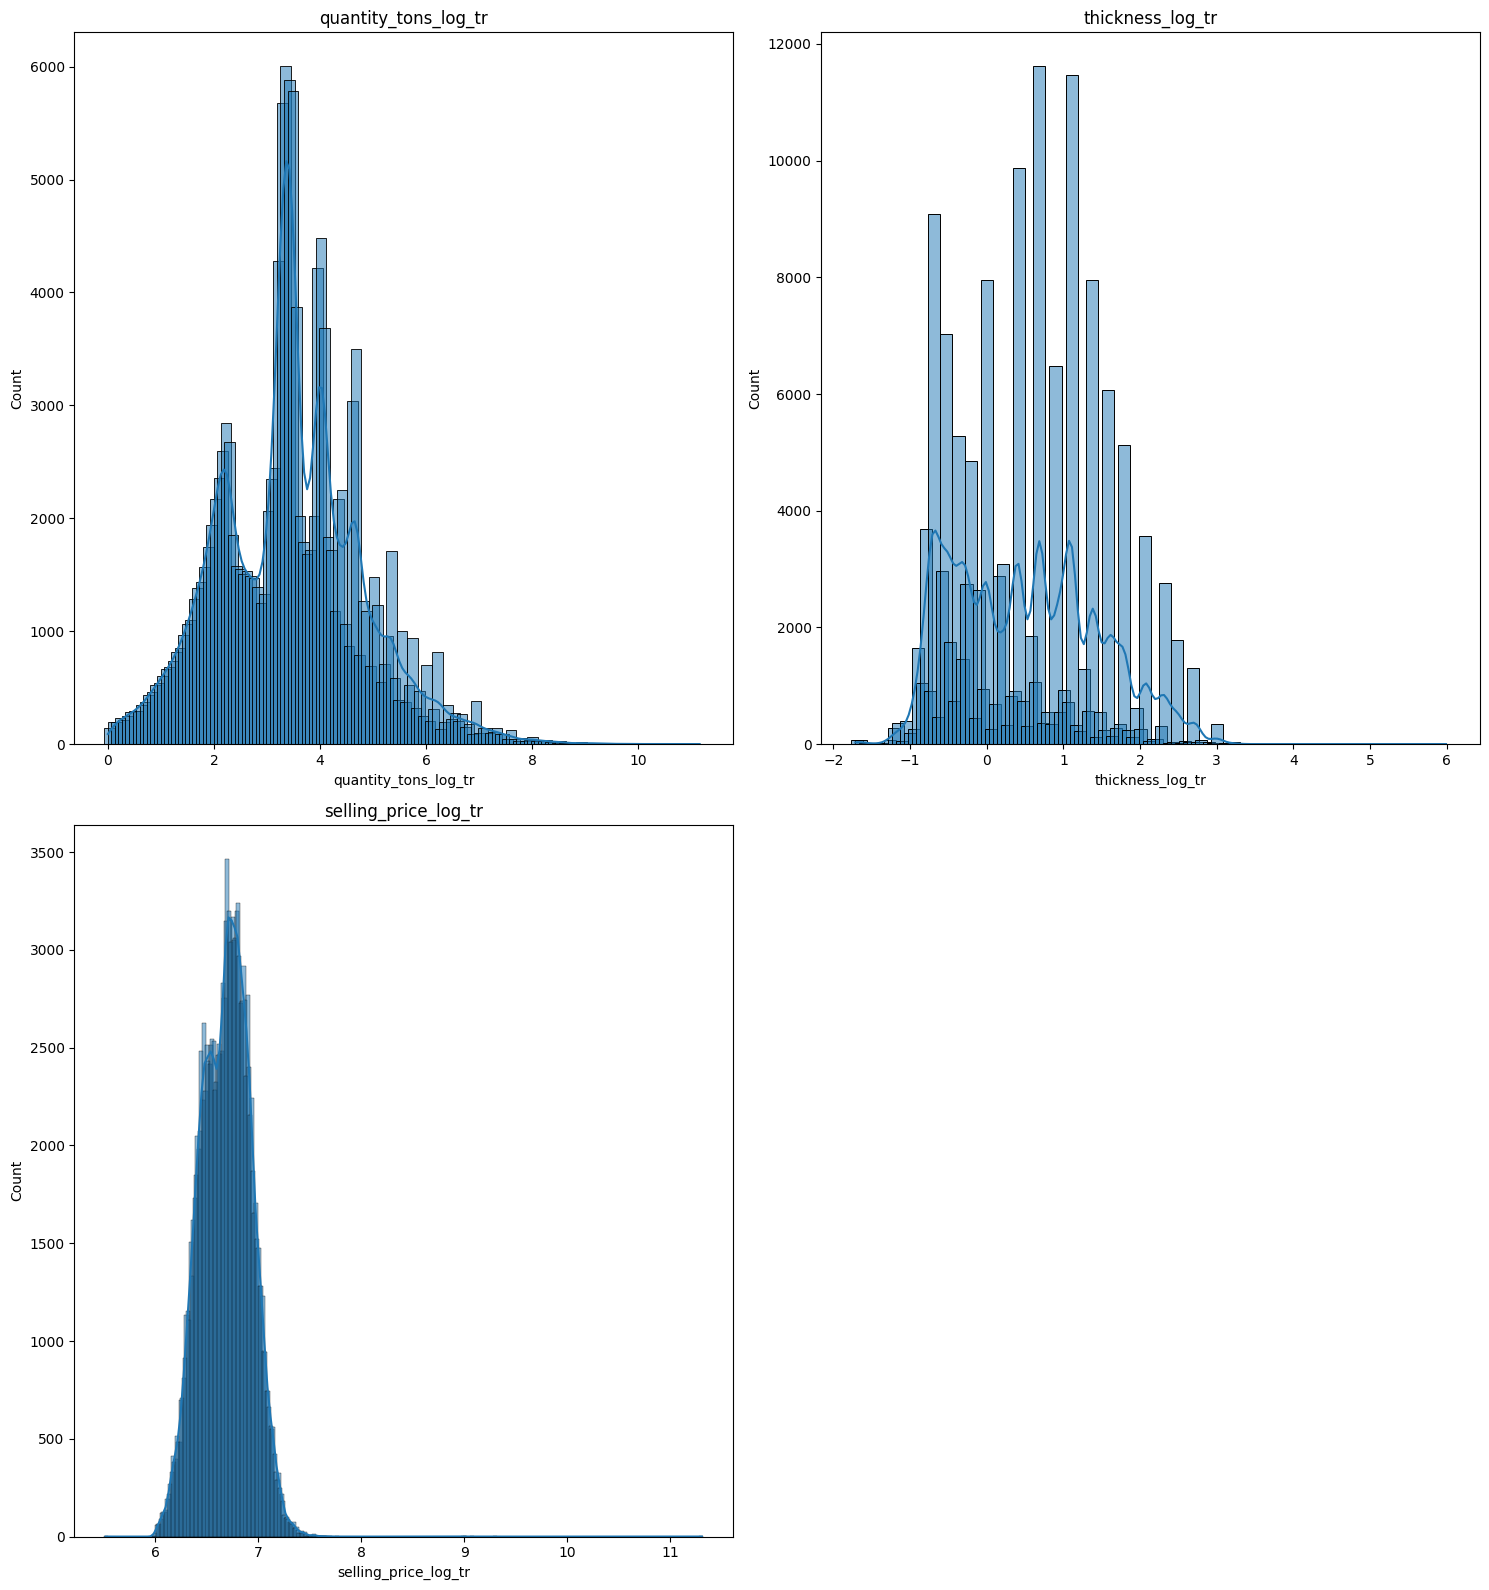

In [277]:
col_log_transform =  ['quantity_tons_log_tr', 'thickness_log_tr', 'selling_price_log_tr']
check_skwness_histplot(col_log_transform)

In [278]:
# Removing outliners - IQR

def outliers(df, feature):
    # Calculate the Interquartile Range (IQR)
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    # Define upper and lower limits for outliers
    up_limit = df[feature].quantile(0.75) + (1.5*IQR)
    lw_limit = df[feature].quantile(0.25) - (1.5*IQR)
    # Clip the values of the feature to be within the upper and lower limits
    df[feature] = df[feature].clip(lw_limit, up_limit)


In [279]:
outliers(copper3, 'quantity_tons_log_tr')
outliers(copper3, 'thickness_log_tr')
outliers(copper3, 'selling_price_log_tr')
outliers(copper3, 'width')

### Checking for Outliners

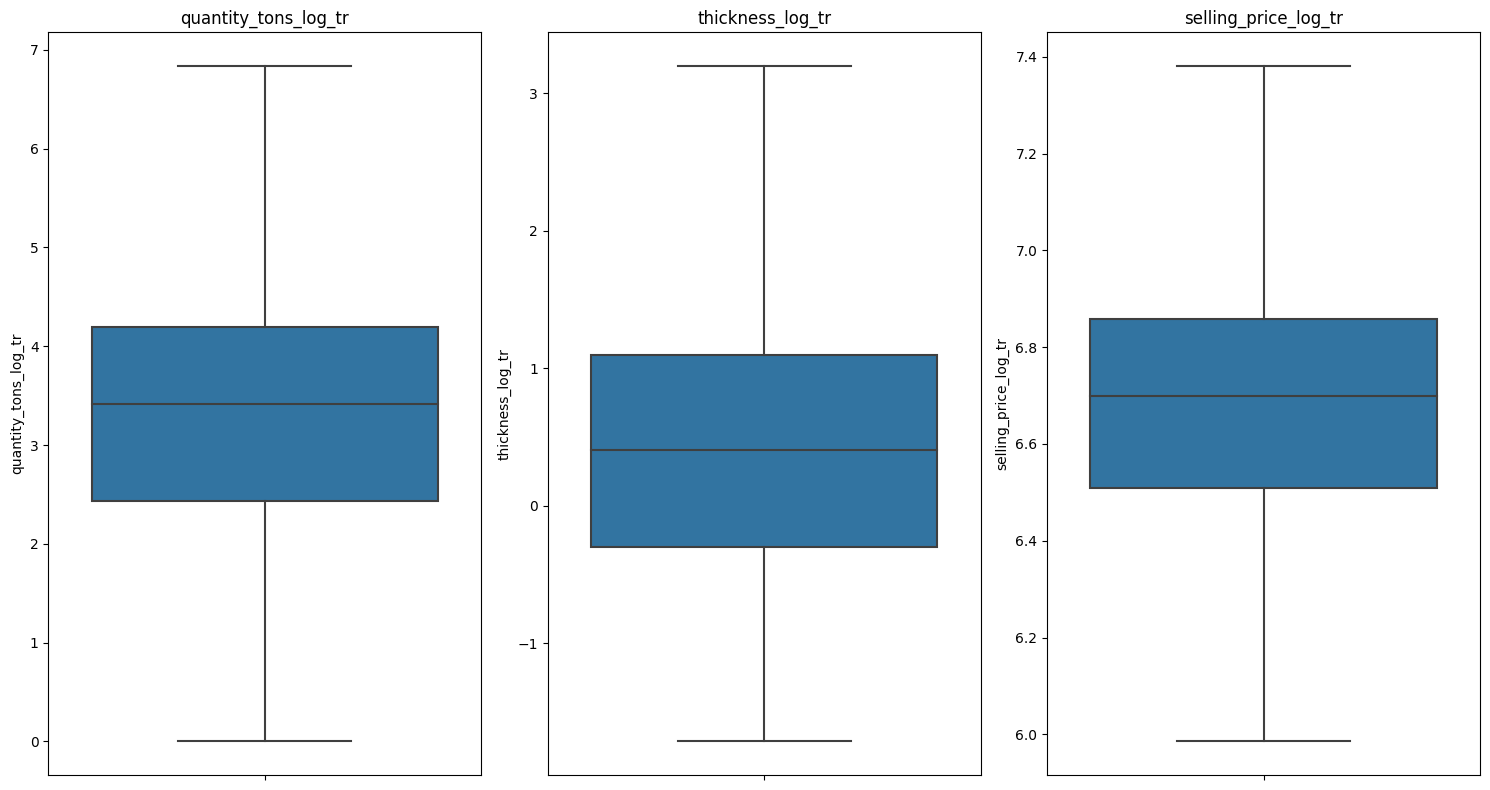

In [280]:
# function for creating box plots for numeric columns to check for outliers

def check_outliner(numeric_col):

  num_col = len(numeric_col)

  num_rows = (num_col + 2) // 3

# Set the figure size based on the number of rows
  fig, axs = plt.subplots(nrows= num_rows, ncols= 3, figsize=(15,8*num_rows))
  axs = axs.flatten()

# Iterate through the numeric columns and create box plots
  for i, var in enumerate(numeric_col):
    sns.boxplot(y=copper3[var], ax=axs[i])
    axs[i].set_title(var)

# If there are more subplots than numeric columns, remove the excess subplots
  if num_col < len(axs):
    for i in range(num_col,len(axs)):
      fig.delaxes(axs[i])

  fig.tight_layout()
  plt.show()

# def check_outlier(numeric_col):usage:
check_outliner(col_log_transform)



In [281]:
#Dropping the features
copper3.drop(['quantity_tons','thickness','selling_price'], axis=1, inplace=True)

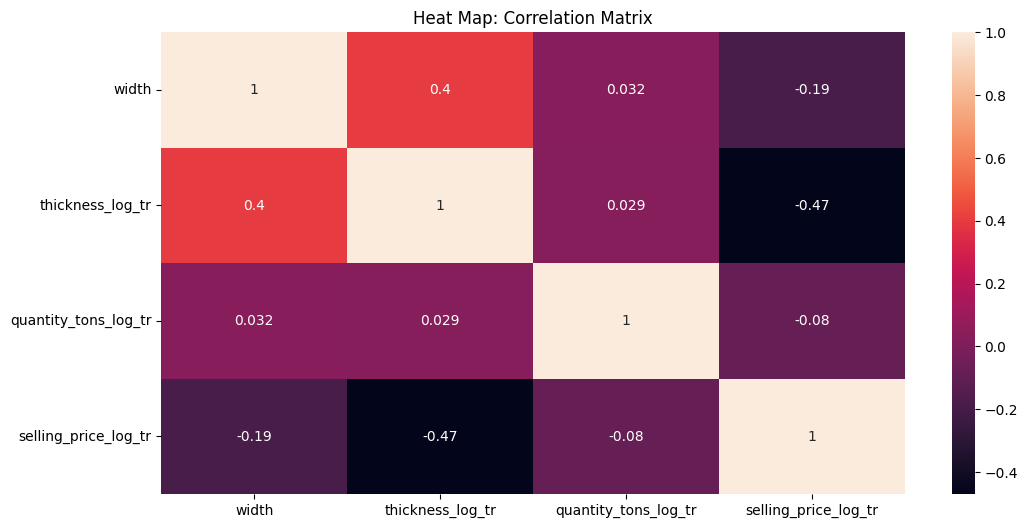

In [282]:
# Calculate the correlation matrix for numeric columns
corr = copper3.loc[:, ['width', 'thickness_log_tr','quantity_tons_log_tr',
                       'selling_price_log_tr']].corr(numeric_only=True)

# Plotting correlation heat map
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

plt.title('Heat Map: Correlation Matrix')

plt.show()

In [283]:
copper3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148356 entries, 0 to 148356
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   item_date             148356 non-null  object 
 1   customer              148356 non-null  int64  
 2   country               148356 non-null  int64  
 3   status                148356 non-null  int64  
 4   item_type             148356 non-null  int64  
 5   application           148356 non-null  int64  
 6   width                 148356 non-null  int64  
 7   product_ref           148356 non-null  int64  
 8   delivery_date         148356 non-null  object 
 9   processing_time       148356 non-null  int64  
 10  quantity_tons_log_tr  148356 non-null  float64
 11  thickness_log_tr      148356 non-null  float64
 12  selling_price_log_tr  148356 non-null  float64
dtypes: float64(3), int64(8), object(2)
memory usage: 15.8+ MB


In [284]:
# Convert 'item_date' column to datetime format
copper3['item_date'] = pd.to_datetime(copper3['item_date'])

# Convert 'delivery_date' column to datetime format
copper3['delivery_date'] = pd.to_datetime(copper3['delivery_date'])

In [285]:
copper3.isnull().sum()

item_date               0
customer                0
country                 0
status                  0
item_type               0
application             0
width                   0
product_ref             0
delivery_date           0
processing_time         0
quantity_tons_log_tr    0
thickness_log_tr        0
selling_price_log_tr    0
dtype: int64

Formating the date columns

In [286]:
copper3['processing_time'].describe()

count   148,356.00
mean         57.78
std          46.88
min        -689.00
25%          25.00
50%          57.00
75%          93.00
max         448.00
Name: processing_time, dtype: float64

In [287]:
# Fixing Analysis range greater than 7 days in processing_time
copper3 = copper3[copper3['processing_time'] >= 7]
copper3 = copper3.reset_index(drop=True)

In [288]:
# Extract day component from 'item_date' and create a new column 'item_date_day'
copper3['item_date_day'] = copper3['item_date'].dt.day

# Extract month component from 'item_date' and create a new column 'item_date_month'
copper3['item_date_month'] = copper3['item_date'].dt.month

# Extract year component from 'item_date' and create a new column 'item_date_year'
copper3['item_date_year'] = copper3['item_date'].dt.year


In [289]:
# Extract day component from 'item_date' and create a new column 'item_date_day'
copper3['item_date_day'] = copper3['item_date'].dt.day

# Extract month component from 'item_date' and create a new column 'item_date_month'
copper3['item_date_month'] = copper3['item_date'].dt.month

# Extract year component from 'item_date' and create a new column 'item_date_year'
copper3['item_date_year'] = copper3['item_date'].dt.year


In [290]:
copper3.drop(['processing_time','delivery_date','item_date'], axis=1, inplace=True)
copper3 = copper3.reset_index(drop= True)

In [291]:
copper3.head()

,customer,country,status,item_type,application,width,product_ref,quantity_tons_log_tr,thickness_log_tr,selling_price_log_tr,item_date_day,item_date_month,item_date_year
0,30156308,28,1,1,10,1500,1670798778,3.99,0.69,6.75,1,4,2021
1,30341428,38,1,2,10,1275,1668701376,4.24,-0.51,7.22,1,4,2021
2,30165529,78,1,1,10,1250,164141591,3.31,-0.29,7.00,1,4,2021
3,30202362,27,1,2,10,1010,628377,3.47,-0.51,6.88,1,4,2021
4,30211222,30,1,1,10,900,611993,3.04,-0.80,7.18,1,4,2021


In [292]:
copper4 = pd.read_csv('https://raw.githubusercontent.com/VivekS-DS/copper_price_prediction_app/main/copper_clean_dataset.csv')
copper4.head()

,customer,country,status,item_type,application,width,product_ref,quantity_tons_log_tr,thickness_log_tr,selling_price_log_tr,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308,28,1,1,10,1500,1670798778,3.99,0.69,6.75,1,4,2021,1,7,2021
1,30341428,38,1,2,10,1275,1668701376,4.24,-0.51,7.22,1,4,2021,1,7,2021
2,30165529,78,1,1,10,1250,164141591,3.31,-0.29,7.00,1,4,2021,1,7,2021
3,30202362,27,1,2,10,1010,628377,3.47,-0.51,6.88,1,4,2021,1,7,2021
4,30211222,30,1,1,10,900,611993,3.04,-0.80,7.18,1,4,2021,1,7,2021
